In [127]:
import numpy as np
import sys
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image


## Import data set

In [136]:
file_path = "I:\\Users\\Thijs\\Downloads\\pokemon_dataset\\dummy"

classes_ = [f for f in os.listdir(file_path) if os.path.isdir(os.path.join(file_path, f))]
BATCH_SIZE = 32


In [174]:
imageDataset_train, imageDataset_test = tf.keras.utils.image_dataset_from_directory(file_path,
                                            labels='inferred',
                                            label_mode = 'categorical',
                                            class_names = classes_,
                                            color_mode='rgb',
                                            subset = 'both', validation_split = 0.5,
                                            shuffle = True, seed = 42,
                                            image_size = (128, 128),
                                            batch_size = BATCH_SIZE)

Found 2 files belonging to 2 classes.
Using 1 files for training.
Using 1 files for validation.


In [197]:
f_im, f_label = next(iter(imageDataset_test))
print(f_im.shape, f_label, classes_)
# im.show()

(1, 128, 128, 3) tf.Tensor([[1. 0.]], shape=(1, 2), dtype=float32) ['Bulbasaur', 'Pikachu']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<dtype: 'float32'>


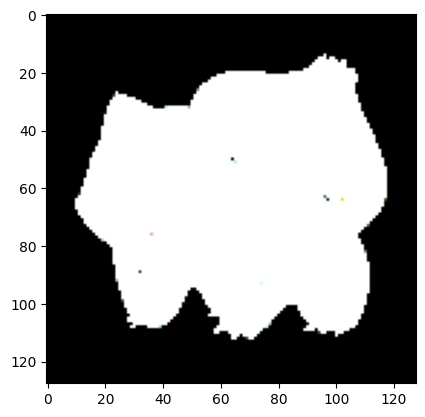

In [198]:
print(f_im[0][0].dtype)

plt.imshow(f_im[0], vmin=0, vmax=255)

In [199]:
imageDataset_test = imageDataset_test.map(lambda x, y: (tf.cast(x, tf.int16), y))

<dtype: 'int16'>


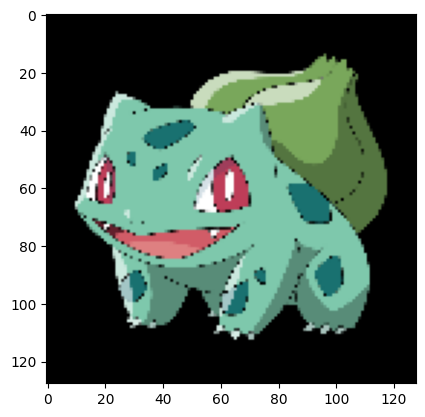

In [200]:
f_im, f_label = next(iter(imageDataset_test))
print(f_im[0][0].dtype)
plt.imshow(f_im[0], vmin=0, vmax=255)